<a href="https://colab.research.google.com/github/chernan77/Taller_3/blob/main/RN_Problem_Set3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
!pip install pandas openpyxl


                         id   Dominio Sexo_JHogar  Edad_JHogar  Edad_JHogar2  \
0  8d0193e328305a042001a35f  MEDELLIN        Male           41          1681   
1  cf7491d7f2cc9c216bd009e7  MEDELLIN        Male           64          4096   
2  d90a57f64d2a84dbacbed2a5  MEDELLIN      Female           38          1444   
3  db34e387a94a783188ab3a33  MEDELLIN        Male           43          1849   
4  97bbef785824746ecab09c6f  MEDELLIN        Male           67          4489   

   Pers_por_Hogar  Menores_18Años  Linea_Indigencia  Linea_Pobreza  \
0               5               3       122809.5342    289878.2471   
1               4               0       122809.5342    289878.2471   
2               3               0       122809.5342    289878.2471   
3               1               0       122809.5342    289878.2471   
4               5               0       122809.5342    289878.2471   

   Total_Ocup  ... Posc_Ocup_JHogar  \
0           2  ...   Otra Actividad   
1           0  ...  

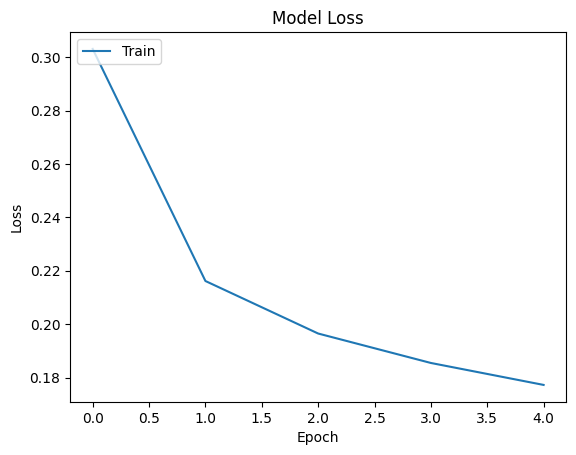

{'loss': [0.3031401038169861, 0.2161675989627838, 0.19648651778697968, 0.18545235693454742, 0.17722569406032562], 'binary_accuracy': [0.8875485062599182, 0.9342188835144043, 0.9450245499610901, 0.9508895874023438, 0.9542843699455261]}
1031/1031 [==============================] - 2s 2ms/step
Accuracy: 0.7977388457807953


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
# Leer el DataFrame
data1 = 'https://raw.githubusercontent.com/chernan77/Redes_Neuronales/main/Train_Data1.xlsx'
df = pd.read_excel(data1, engine='openpyxl')
print(df.head())


df = pd.get_dummies(df, columns=['Cat_Ocup_JHogar', 'Posc_Ocup_JHogar', 'Educ_JHogar','SS_Jefe'])
df['Sexo_JHogar'] = df['Sexo_JHogar'].map({'Male': 1, 'Female': 0})
# Convertir la columna 'Pobreza' a valores numéricos
df['Pobreza'] = df['Pobreza'].map({'si': 1, 'no': 0})
df.drop('Dominio', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)


# Paso 2: Normalizar las variables numéricas (excepto la columna 'Pobreza')
features = df.drop(columns=['Pobreza'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Paso 3: División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['Pobreza'], test_size=0.2, random_state=123)

# Paso 4: Crear y compilar el modelo de red neuronal
model = Sequential()
model.add(Dense(units=1, input_dim=X_train.shape[1], activation='sigmoid'))
model.compile(optimizer = Adam(), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, verbose=1, batch_size=8)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# history.history es un diccionario que contiene las métricas registradas durante el entrenamiento
print(history.history)

import tensorflow as tf
from sklearn.metrics import accuracy_score

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
accuracy = accuracy_score(y_test, predicted_labels)

print(f"Accuracy: {accuracy}")


{'loss': [3.5944297313690186, 3.594426393508911, 3.5944228172302246, 3.5944228172302246, 3.594435691833496], 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0]}


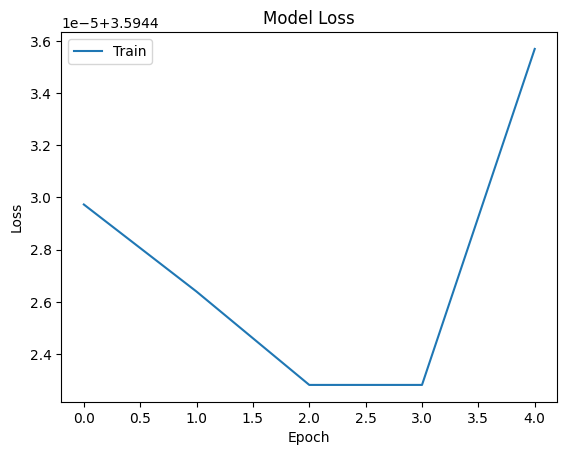

1031/1031 [==============================] - 2s 2ms/step
Accuracy: 0.7977388457807953


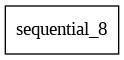

In [21]:

#MODELO 2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
# Asumiendo que x_train y y_train ya están definidos y preprocesados

# Construir el modelo secuencial con Keras
model_simple_relu = Sequential()
model.add(Dense(units=1, input_dim=X_train.shape[1], activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
history = model_simple_relu.fit(X_train, y_train, epochs=5, verbose=0, batch_size=8)
print(history.history)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

import tensorflow as tf
from sklearn.metrics import accuracy_score

# Realizar predicciones
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
accuracy = accuracy_score(y_test, predicted_labels)

print(f"Accuracy: {accuracy}")

# Visualizar la estructura del modelo (opcional)
# Para instalar el paquete necesario para visualizar la estructura del modelo puedes usar:
# pip install pydot pydotplus graphviz
plot_model(model_simple_relu, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Para mostrar la imagen del modelo en el notebook (si estás usando Jupyter)
from IPython.display import Image
Image(filename='model_plot.png')


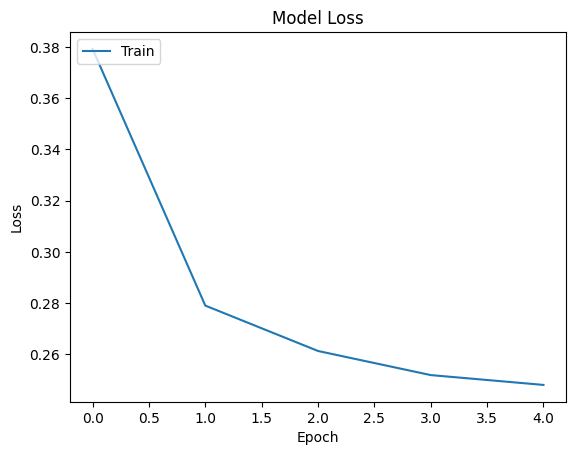

1031/1031 [==============================] - 2s 2ms/step
Accuracy: 0.9448654219204655


In [22]:
#MODELO 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear un modelo de red neuronal para clasificación binaria
model_simple_tanh_classifier = Sequential()
model_simple_tanh_classifier.add(Dense(units=1, input_shape=(X_train.shape[1],), activation="sigmoid"))

# Compilar el modelo para clasificación binaria
model_simple_tanh_classifier.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(),
    metrics=["accuracy"]
)

# Entrenar el modelo
history = model_simple_tanh_classifier.fit(X_train, y_train, epochs=5, verbose=0, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Realizar predicciones
predictions = model_simple_tanh_classifier.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)

# Calcular la precisión
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")



Epoch 1/5
4124/4124 - 10s - loss: 0.1836 - accuracy: 0.9343 - 10s/epoch - 2ms/step
Epoch 2/5
4124/4124 - 9s - loss: 0.1213 - accuracy: 0.9631 - 9s/epoch - 2ms/step
Epoch 3/5
4124/4124 - 8s - loss: 0.1011 - accuracy: 0.9697 - 8s/epoch - 2ms/step
Epoch 4/5
4124/4124 - 9s - loss: 0.0898 - accuracy: 0.9751 - 9s/epoch - 2ms/step
Epoch 5/5
4124/4124 - 8s - loss: 0.0808 - accuracy: 0.9785 - 8s/epoch - 2ms/step


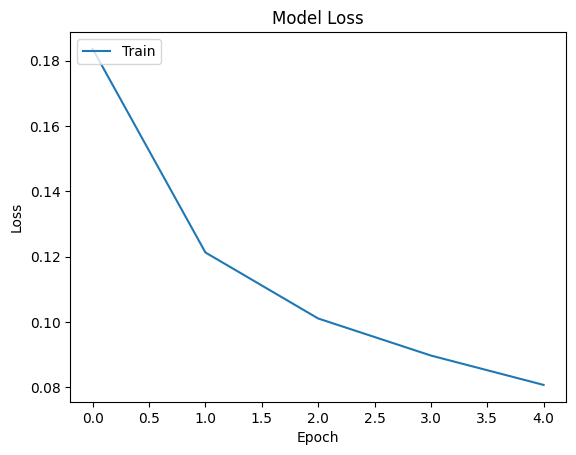

1031/1031 [==============================] - 2s 2ms/step
Accuracy: 0.978176527643065


In [23]:
#MODELO 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear un modelo de red neuronal profundo para clasificación binaria
model_profundo_classifier = Sequential()
model_profundo_classifier.add(Dense(units=64, input_shape=(X_train.shape[1],), activation="relu"))
model_profundo_classifier.add(Dense(units=1, activation="sigmoid"))  # Capa de salida para clasificación binaria

# Compilar el modelo para clasificación binaria
model_profundo_classifier.compile(
    loss="binary_crossentropy",  # Función de pérdida para clasificación binaria
    optimizer=RMSprop(),  # Selecciona el optimizador adecuado
    metrics=["accuracy"]
)

# Entrenar el modelo
history = model_profundo_classifier.fit(X_train, y_train, epochs=5, verbose=2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Realizar predicciones
predictions = model_profundo_classifier.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)

# Calcular la precisión
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")



Epoch 1/15
4124/4124 - 12s - loss: 0.1619 - accuracy: 0.9366 - 12s/epoch - 3ms/step
Epoch 2/15
4124/4124 - 9s - loss: 0.0915 - accuracy: 0.9645 - 9s/epoch - 2ms/step
Epoch 3/15
4124/4124 - 7s - loss: 0.0756 - accuracy: 0.9708 - 7s/epoch - 2ms/step
Epoch 4/15
4124/4124 - 9s - loss: 0.0659 - accuracy: 0.9753 - 9s/epoch - 2ms/step
Epoch 5/15
4124/4124 - 9s - loss: 0.0611 - accuracy: 0.9777 - 9s/epoch - 2ms/step
Epoch 6/15
4124/4124 - 8s - loss: 0.0582 - accuracy: 0.9792 - 8s/epoch - 2ms/step
Epoch 7/15
4124/4124 - 9s - loss: 0.0547 - accuracy: 0.9802 - 9s/epoch - 2ms/step
Epoch 8/15
4124/4124 - 7s - loss: 0.0517 - accuracy: 0.9812 - 7s/epoch - 2ms/step
Epoch 9/15
4124/4124 - 9s - loss: 0.0500 - accuracy: 0.9819 - 9s/epoch - 2ms/step
Epoch 10/15
4124/4124 - 9s - loss: 0.0474 - accuracy: 0.9823 - 9s/epoch - 2ms/step
Epoch 11/15
4124/4124 - 8s - loss: 0.0469 - accuracy: 0.9829 - 8s/epoch - 2ms/step
Epoch 12/15
4124/4124 - 9s - loss: 0.0461 - accuracy: 0.9831 - 9s/epoch - 2ms/step
Epoch 13/15

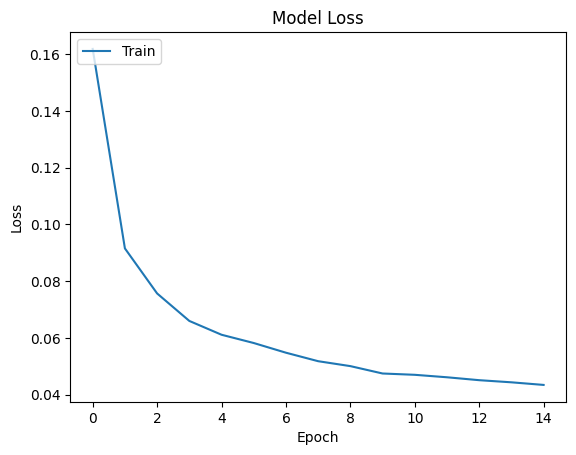

Test loss: 0.040798645466566086
1031/1031 [==============================] - 2s 2ms/step
Accuracy: 0.9853297769156159
                         id      Dominio Sexo_JHogar  Edad_JHogar  \
0  2a7ddc2779480d7f19834953  SANTA MARTA        Male           58   
1  a0c2e751e582fd49d564f308  SANTA MARTA        Male           41   
2  57273d19e8464a5ff66a582b        RURAL        Male           50   
3  418d052ff7878940ab938601     MEDELLIN      Female           60   
4  212a37fc17016a3c78f76852     MEDELLIN        Male           37   

   Edad_JHogar2  Pers_por_Hogar  Menores_18Años           Li           Lp  \
0          3364               5               0  121449.4529  275594.0294   
1          1681               6               2  121449.4529  275594.0294   
2          2500               2               0  100763.3376  170886.4474   
3          3600               5               0  122251.7816  294093.6653   
4          1369               2               0  123664.3598  293293.4112   

   T

In [5]:
#modelo 5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear un modelo de red neuronal profundo para clasificación binaria
model_classifier = Sequential()
model_classifier.add(Dense(units=64, input_shape=(X_train.shape[1],), activation="relu"))
model_classifier.add(Dense(units=32, activation="relu"))
model_classifier.add(Dense(units=1, activation="sigmoid"))  # Capa de salida para clasificación binaria

# Compilar el modelo para clasificación binaria
model_classifier.compile(
    loss="binary_crossentropy",  # Función de pérdida para clasificación binaria
    optimizer=RMSprop(),  # Selecciona el optimizador adecuado
    metrics=["accuracy"]
)

# Entrenar el modelo
history = model_classifier.fit(X_train, y_train, epochs=15, verbose=2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Evaluar el modelo
score = model_classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])

# Realizar predicciones
predictions = model_classifier.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)

# Calcular la precisión
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")

# Leer el DataFrame de los datos de prueba
data_test = 'https://raw.githubusercontent.com/chernan77/Redes_Neuronales/main/Test_Data.xlsx'
db = pd.read_excel(data_test, engine='openpyxl')
print(db.head())

db = pd.get_dummies(db, columns=['Cat_Ocup_JHogar', 'Posc_Ocup_JHogar', 'Educ_JHogar','SS_Jefe'])
db['Sexo_JHogar'] = db['Sexo_JHogar'].map({'Male': 1, 'Female': 0})
db.drop('Dominio', axis=1, inplace=True)
db.drop('id', axis=1, inplace=True)

# Realizar predicciones fuera de muestra
predictions = model_classifier.predict(db)
predicted_labels = (predictions > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)



